# Part 2: Scrape and Analyse Mars Weather Data

In [43]:
#Importing Dependencies
from splinter import Browser
from bs4 import BeautifulSoup
from pprint import pprint
from webdriver_manager.chrome import ChromeDriverManager
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Settingup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Initialise PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [4]:
# Define database and collection
db = client.mars_weather_db
collection = db.articles

In [5]:
#Setting up browser for the Website from which the data is to be scraped
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

## Scraping Data

In [6]:
#Scraping the Table from the Mars Weather Site.
table = pd.read_html(url)
table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

## Analysing Scraped Data

In [17]:
#Converting the scraped html table into a Pandas Dataframe
mars_weather_df=table[0]
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [13]:
#finding the datatype of each column
result = mars_weather_df.dtypes
print(result)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [23]:
#Converting(Casting) the datatype of the "terrestial_date"column to datetime
mars_weather_df["terrestrial_date"]=pd.to_datetime(mars_weather_df['terrestrial_date'], dayfirst=True)
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [91]:
#finding the datatype of each column after conversion
result = mars_weather_df.dtypes
print(result)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### 1.How many months are there on Mars?

In [27]:
#Calculating the number of months on Mars.
Mars_months = mars_weather_df['month'].max()
Mars_months

12

### 2.How many Martian (not Earth) days' worth of data are there in the scraped dataset?

In [32]:
#Calculating the Number of Martian Days' worth of data in the dataset.
mars_weather_df['sol'].count()


1867

### 3.What are the coldest and warmest months on Mars (at the location of Curiosity)?

In [80]:
#Calculating the coldest and warmest months on Mars
min_temp_df=mars_weather_df.groupby("month").mean()
min_temp_df

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [81]:
# Set x axis and tick locations
x_axis = np.arange(len(min_temp_df))
tick_locations = [value+0.4 for value in x_axis]

Text(0.5, 1.0, 'Martian Months Vs Minimum Temperature')

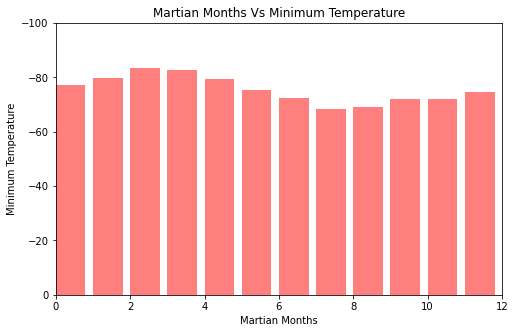

In [82]:
#Plotting bar chart to determine the coldest and warmest months on Mars (at the location of Curiosity)
plt.figure(figsize=(8,5))
plt.xlim([0,12])
plt.ylim([0,-100])
plt.bar(x_axis, min_temp_df["min_temp"], color='r', alpha=0.5, align="edge")
plt.ylabel("Minimum Temperature")
plt.xlabel("Martian Months")
plt.title("Martian Months Vs Minimum Temperature")

From the above Bar chart we can observe that 3rd month is the coldest month and 8th month is the hottest month on Mars.

### 4.Which months have the lowest and highest atmospheric pressure on Mars?

Text(0.5, 1.0, 'Martian Months Vs Atmospheric Pressure')

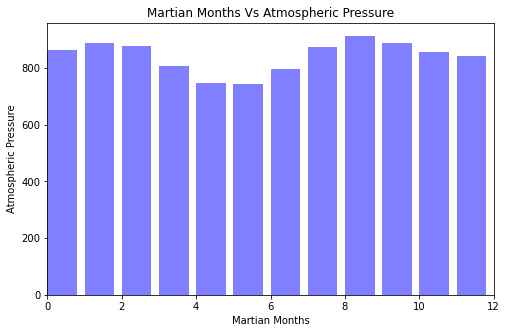

In [84]:
#Plotting Bar Chart to determine months having the lowest and highest atmospheric pressure on Mars
plt.figure(figsize=(8,5))
plt.xlim([0,12])
#plt.ylim([0,-100])
plt.bar(x_axis, min_temp_df["pressure"], color='b', alpha=0.5, align="edge")
plt.ylabel("Atmospheric Pressure")
plt.xlabel("Martian Months")
plt.title("Martian Months Vs Atmospheric Pressure")

From the above Bar Chart we can Observe that the 6th month has the Lowest Atmospheric Pressure and the 9th month has the Highest Atmospheric Pressure on Mars.

### 5.Approximately how many terrestrial (earth) days are there in a Martian year?

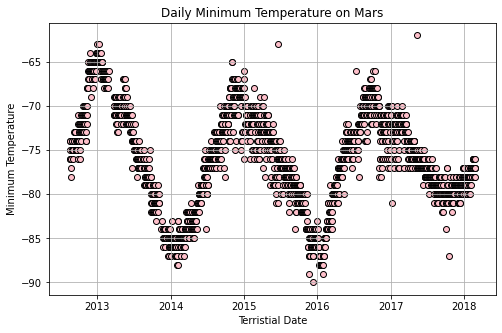

In [90]:
plt.figure(figsize=(8,5))
plt.scatter(mars_weather_df["terrestrial_date"], mars_weather_df["min_temp"], marker="o",facecolors="pink", edgecolors="black")
plt.title("Daily Minimum Temperature on Mars")
plt.ylabel("Minimum Temperature")
plt.xlabel("Terristial Date")
plt.grid(True)

From the above Scatter Plot we can observe that the pattern of the Minimum Temperature repeats itself roughly around every two years on Earth. Hence we can determine that One Martian Year is roughly around 1.8 to 2 Years on Earth.

## Exporting the DataFrame to a CSV file.

In [85]:
# Exporting file as a CSV, without the Pandas index, but with the header
mars_weather_df.to_csv("Output/mars_weather.csv", index=False, header=True)

In [ ]:
browser.quit()